# **Import Library**


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats

# warning library
import warnings
warnings.filterwarnings("ignore")



<a id ='1' ></a>
<h2 style = "background:black;color:white;border:0;font-family:Comic Sans MS">Load and Check Data</h2>

In [2]:
# Cho phép kết nối với ggdrive để đọc dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Đọc dữ liệu từ file csv
data = pd.read_csv('/content/drive/MyDrive/KPDLL-2022/Doan/winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# the columns 
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
print("Kích thước dữ liệu --> ",data.shape)

Kích thước dữ liệu -->  (1599, 12)


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Mô tả biến

độ axit cố định: hầu hết các axit liên quan đến rượu vang hoặc cố định hoặc không bay hơi (không dễ bay hơi)

độ axit dễ bay hơi : lượng axit axetic trong rượu vang, ở mức quá cao có thể dẫn đến mùi giấm khó chịu

axit citric : được tìm thấy với số lượng nhỏ, axit citric có thể thêm 'độ tươi' và hương vị cho rượu vang

đường dư : lượng đường còn lại sau khi ngừng lên men, rất hiếm tìm được loại rượu có hàm lượng dưới 1 gam/lít và

clorua: lượng muối trong rượu

sulfur dioxide tự do : dạng SO2 tự do tồn tại ở trạng thái cân bằng giữa SO2 phân tử (dưới dạng khí hòa tan) và ion bisulfite; nó ngăn chặn

tổng sulfur dioxide : lượng S02 ở dạng tự do và liên kết; ở nồng độ thấp, SO2 hầu như không thể phát hiện được trong rượu, nhưng ở SO2 tự do

mật độ: mật độ của nước gần bằng nước tùy thuộc vào phần trăm hàm lượng cồn và đường

ph : mô tả mức độ axit hoặc bazơ của rượu vang trên thang điểm từ 0 (rất axit) đến 14 (rất cơ bản); hầu hết các loại rượu vang nằm trong khoảng từ 3-4 trên

sulphate : một chất phụ gia rượu vang có thể góp phần làm tăng nồng độ khí sulfur dioxide (S02), hoạt động như một chất kháng khuẩn và

rượu sulfur dioxide: phần trăm nồng độ cồn của rượu

chất lượng: biến đầu ra (dựa trên dữ liệu cảm quan, điểm từ 0 đến 10)

In [8]:
print("Thông tin dữ liệu")
data.info()

Thông tin dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Phân tích dữ liệu cơ bản

Trong phần này, chúng ta sẽ xem xét các thuộc tính có ảnh hưởng như thế nào đến biến mục tiêu.

cố định độ chua - chất lượng

độ axit dễ bay hơi - chất lượng

axit xitric - chất lượng

đường dư - chất lượng

clorua - chất lượng

sulfur dioxide miễn phí - chất lượng

tổng lưu huỳnh điôxít - chất lượng

mật độ - chất lượng

pH - chất lượng

sunfat - chất lượng

rượu - chất lượng

<a id ='4' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">fixed acidity - quality </h4>

In [9]:
data[["fixed acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,fixed acidity
0,3,8.360000
1,4,7.779245
2,5,8.167254
3,6,8.347179
4,7,8.872362
5,8,8.566667


Có thể thấy rằng sự gia tăng nồng độ axit cố định ảnh hưởng tích cực đến số phiếu đã cho. Nhưng rất khó để đưa ra kết luận đầy đủ ở giai đoạn này.

<a id ='5' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">volatile acidity - quality </h4>

In [10]:
data[["volatile acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
4,7,0.403920
5,8,0.423333


Ở đây chúng ta có thể tạo ra một câu chính xác hơn theo nhận xét chúng ta đã đưa ra ở trên. Độ axit bay hơi giảm ảnh hưởng tích cực đến phiếu bầu.

<a id ='6' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">cidric acid - quality </h4>

In [11]:
data[["citric acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176
5,8,0.391111


Từ đây, chúng ta thấy rằng sự gia tăng axit xitric ảnh hưởng tích cực đến các phiếu bầu.

<a id ='7' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">residual sugar - quality </h4>

In [12]:
data[["residual sugar","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,residual sugar
0,3,2.635000
1,4,2.694340
2,5,2.528855
3,6,2.477194
4,7,2.720603
5,8,2.577778


Có vẻ khó để đưa ra kết luận về lượng đường còn lại từ đây.

<a id ='8' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">chlorides - quality </h4>

In [13]:
data[["chlorides","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,chlorides
0,3,0.122500
1,4,0.090679
2,5,0.092736
3,6,0.084956
4,7,0.076588
5,8,0.068444


Việc giảm clorua ảnh hưởng tích cực đến số phiếu bầu.

<a id ='9' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">free sulfur dioxide - quality </h4>

In [14]:
data[["free sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,free sulfur dioxide
0,3,11.000000
1,4,12.264151
2,5,16.983847
3,6,15.711599
4,7,14.045226
5,8,13.277778


Có vẻ như cũng không dễ dàng để bình luận về sulfur dioxide tự do. Các mức 13, 14 dường như đã được bình chọn tốt.

<a id ='10' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">total sulfur dioxide - quality </h4>

In [15]:
data[["total sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,total sulfur dioxide
0,3,24.900000
1,4,36.245283
2,5,56.513950
3,6,40.869906
4,7,35.020101
5,8,33.444444


<a id ='11' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">density - quality </h4>

In [16]:
data[["density","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,density
0,3,0.997464
1,4,0.996542
2,5,0.997104
3,6,0.996615
4,7,0.996104
5,8,0.995212


Cường độ gần như giống nhau trong tất cả các phiếu bầu, nhưng chỉ có một sự giảm nhẹ. Mật độ giảm dường như có tác động tích cực đến số phiếu bầu.

<a id ='12' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">pH - quality </h4>

In [17]:
data[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


Chúng ta có thể nói rằng việc giảm độ pH ảnh hưởng tích cực đến phiếu bầu

<a id ='13' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">sulphates - quality</h4>

In [18]:
data[["sulphates","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,sulphates
0,3,0.570000
1,4,0.596415
2,5,0.620969
3,6,0.675329
4,7,0.741256
5,8,0.767778


Từ đây rõ ràng là sự gia tăng sunfat có tác động tích cực.

<a id ='14' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">alcohol - quality</h4>

In [19]:
data[["alcohol","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,alcohol
0,3,9.955000
1,4,10.265094
2,5,9.899706
3,6,10.629519
4,7,11.465913
5,8,12.094444


Nhìn chung, có thể nói tỷ lệ rượu bia tăng ảnh hưởng tốt đến phiếu bầu

Thiếu giá trị 

Chúng tôi sẽ xem xét nếu có bất kỳ dữ liệu nào bị thiếu trong dữ liệu của chúng tôi. Nếu có, chúng tôi sẽ cố gắng loại bỏ chúng

In [20]:
print("Chúng tôi có dữ liệu có giá trị rỗng trong các cột không?")
data.columns[data.isnull().any()]

Chúng tôi có dữ liệu có giá trị rỗng trong các cột không?


Index([], dtype='object')

In [85]:
data.isnull().values.any()

False

In [21]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

chúng tôi thấy rằng không có dữ liệu bị thiếu trong dữ liệu.

## **Trực quan hóa dữ liệu**


<ul>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > fixed acidity </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > volatile acidity </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >citric acid </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > residual sugar </p> </li>
            <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >chlorides </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >free sulfur dioxide </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >total sulfur dioxide </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >density </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >pH </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >sulphates </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >alcohol </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >quality </p> </li>
</ul> 

<a id ='17' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">fixed acidity</h4>

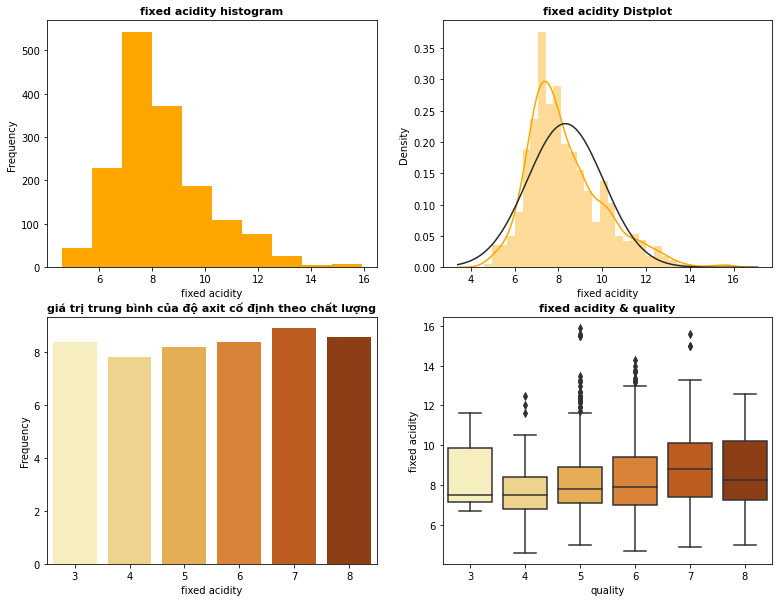

In [22]:
quality = [3,4,5,6,7,8]
fixedAcidityMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["fixed acidity"].mean()
    fixedAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["fixed acidity"], color="orange")
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.title("fixed acidity histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = fixedAcidityMean, palette="YlOrBr")
plt.title("giá trị trung bình của độ axit cố định theo chất lượng", color = "black", fontweight='bold', fontsize = 11)
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["fixed acidity"], palette='YlOrBr')
plt.title("fixed acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Độ chua cố định có thể không ảnh hưởng nhiều đến việc tách phiếu.
Trên biểu đồ thứ 2, chúng ta thấy rằng có một độ lệch sang bên phải. 
Chúng ta cần sửa lỗi này

<a id ='18' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">volatile acidity</h4>

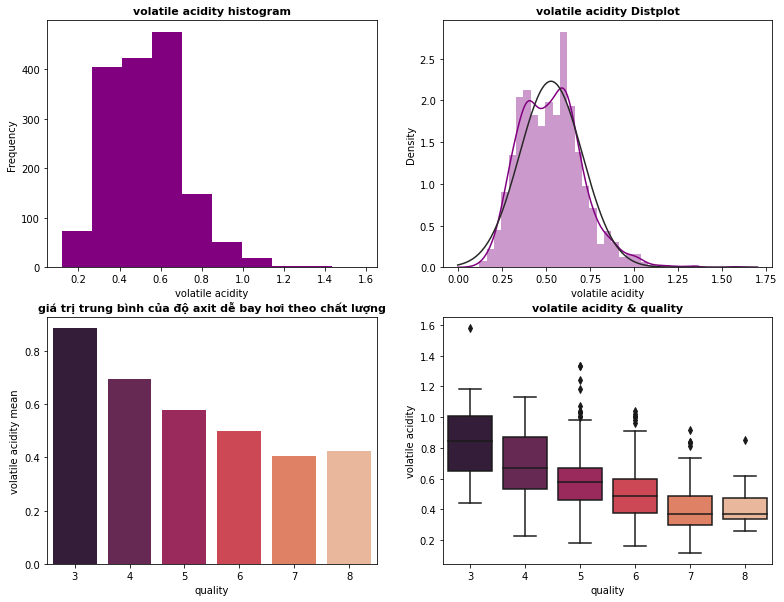

In [23]:
volatileAcidityMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["volatile acidity"].mean()
    volatileAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["volatile acidity"], color="purple")
plt.xlabel("volatile acidity")
plt.ylabel("Frequency")
plt.title("volatile acidity histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["volatile acidity"], fit=norm, color="purple")
plt.title("volatile acidity Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = volatileAcidityMean, palette= "rocket")
plt.title("giá trị trung bình của độ axit dễ bay hơi theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("volatile acidity mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["volatile acidity"], palette='rocket')
plt.title("volatile acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Việc giảm độ axit dễ bay hơi dường như ảnh hưởng tích cực đến các phiếu bầu.
 
Khi chúng tôi kiểm tra đồ thị thứ hai, chúng tôi thấy rằng phân phối là tốt

<a id ='19' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">citric acid</h4>

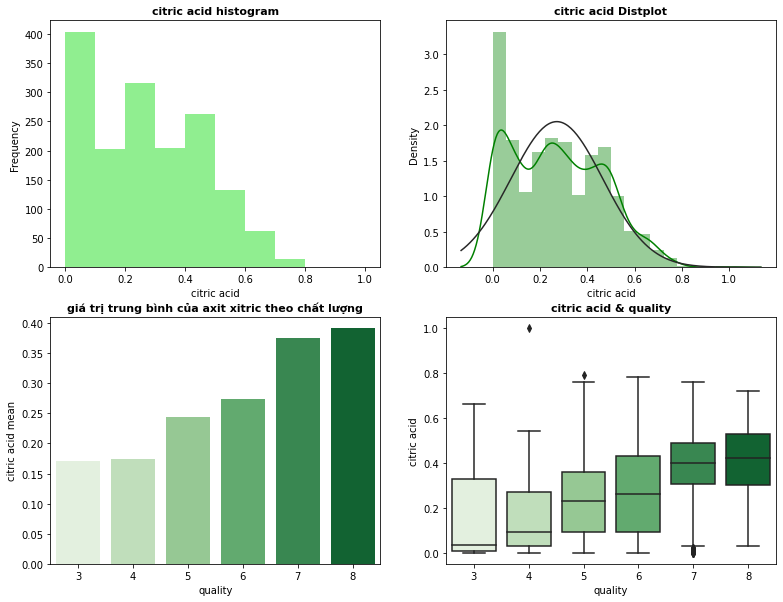

In [24]:
citricAcidMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["citric acid"].mean()
    citricAcidMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["citric acid"], color="lightgreen")
plt.xlabel("citric acid")
plt.ylabel("Frequency")
plt.title("citric acid histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["citric acid"], fit=norm, color="green")
plt.title("citric acid Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = citricAcidMean, palette= "Greens")
plt.title("giá trị trung bình của axit xitric theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("citric acid mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["citric acid"], palette='Greens')
plt.title("citric acid & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Có thể nói rằng sự gia tăng axit xitric ảnh hưởng tích cực đến phiếu bầu.





<a id ='21' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">residual sugar</h4>

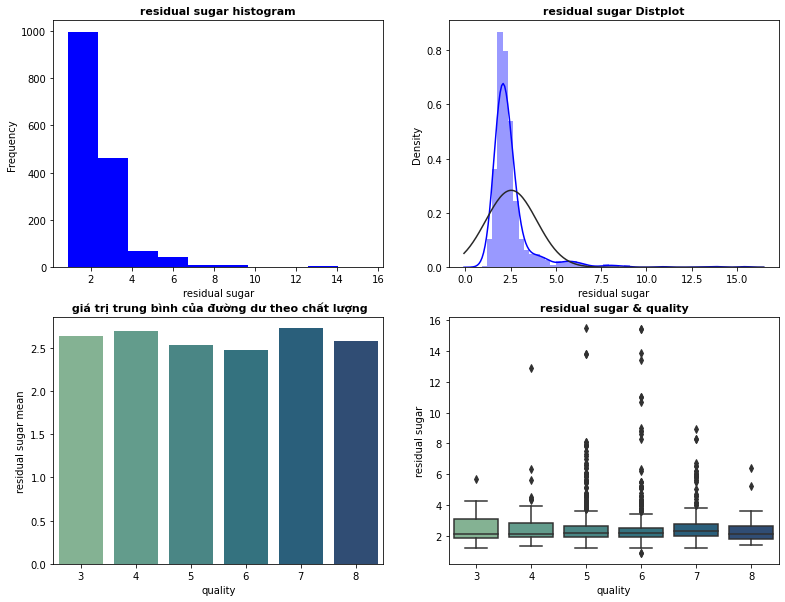

In [25]:
residualSugarMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["residual sugar"].mean()
    residualSugarMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["residual sugar"], color="blue")
plt.xlabel("residual sugar")
plt.ylabel("Frequency")
plt.title("residual sugar histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["residual sugar"], fit=norm, color="blue")
plt.title("residual sugar Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = residualSugarMean, palette= "crest")
plt.title(" giá trị trung bình của đường dư theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("residual sugar mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["residual sugar"], palette='crest')
plt.title("residual sugar & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Ước tính lượng đường còn lại dường như không có nhiều tác dụng. 

Ta thấy có sự lệch về bên phải theo phân phối chuẩn.

<a id ='22' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">chlorides</h4>

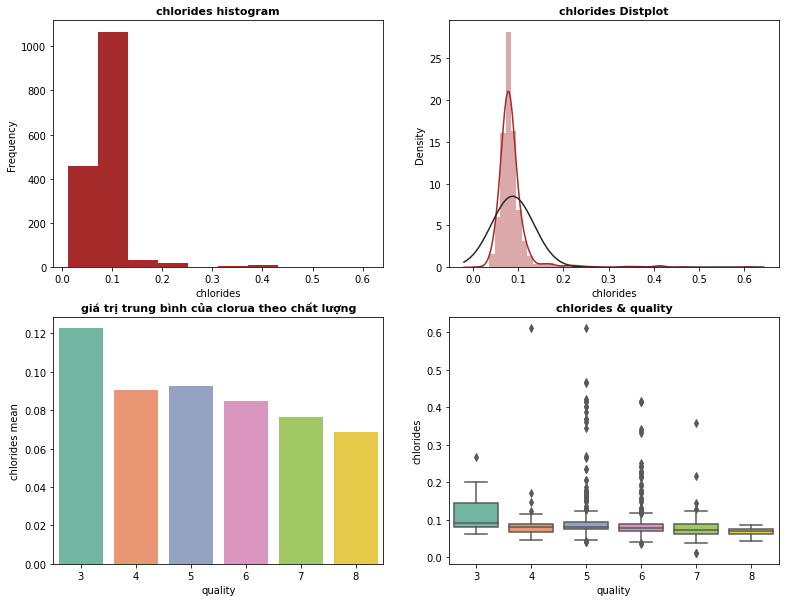

In [26]:
chloridesMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["chlorides"].mean()
    chloridesMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["chlorides"], color="brown")
plt.xlabel("chlorides")
plt.ylabel("Frequency")
plt.title("chlorides histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["chlorides"], fit=norm, color="brown")
plt.title("chlorides Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = chloridesMean, palette= "Set2")
plt.title("giá trị trung bình của clorua theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("chlorides mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["chlorides"], palette='Set2')
plt.title("chlorides & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Chúng tôi thấy rằng việc giảm clorua có tác động tích cực đến số phiếu bầu..

 Nếu chúng ta nhìn vào biểu đồ thứ tư, chúng ta sẽ thấy rằng có quá nhiều điểm khác biệt.
 
 Chúng ta cần phải sửa chữa những điều này. Nếu không, chúng sẽ ảnh hưởng tiêu cực đến mô hình của chúng ta

<a id ='23' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">free sulfur dioxide</h4>

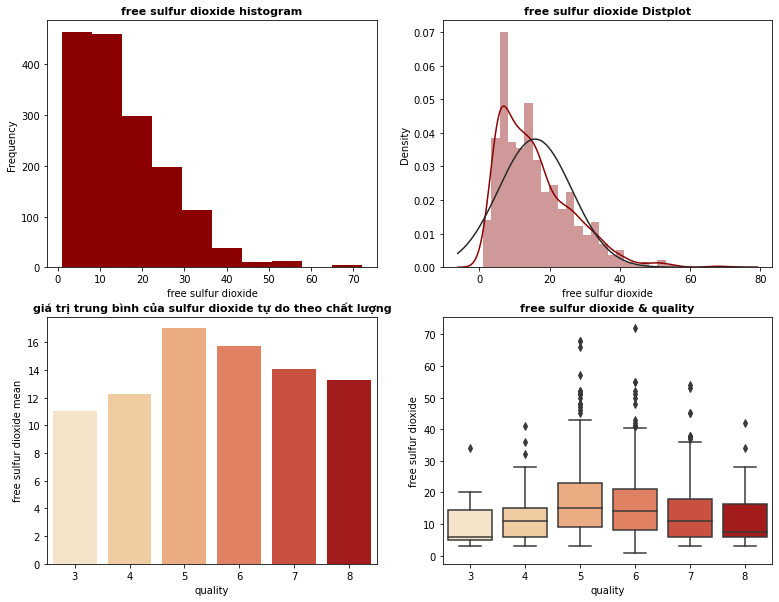

In [27]:
freeSulfurDioxideMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["free sulfur dioxide"].mean()
    freeSulfurDioxideMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["free sulfur dioxide"], color="darkred")
plt.xlabel("free sulfur dioxide")
plt.ylabel("Frequency")
plt.title("free sulfur dioxide histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="darkred")
plt.title("free sulfur dioxide Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = freeSulfurDioxideMean, palette= "OrRd")
plt.title("giá trị trung bình của sulfur dioxide tự do theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["free sulfur dioxide"], palette='OrRd')
plt.title("free sulfur dioxide & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Khi chúng tôi kiểm tra các biểu đồ ở đây, chúng tôi thấy rằng biểu đồ đang nghiêng về bên phải, chúng tôi sẽ sửa lỗi này bên dưới.

Nếu chúng ta nhìn vào biểu đồ thứ tư, chúng ta sẽ thấy rằng có quá nhiều điểm khác biệt. Chúng ta cần phải sửa chữa những điều này. Nếu không, chúng sẽ ảnh hưởng tiêu cực đến mô hình của chúng ta.

<a id ='24' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">total sulfur dioxide</h4>

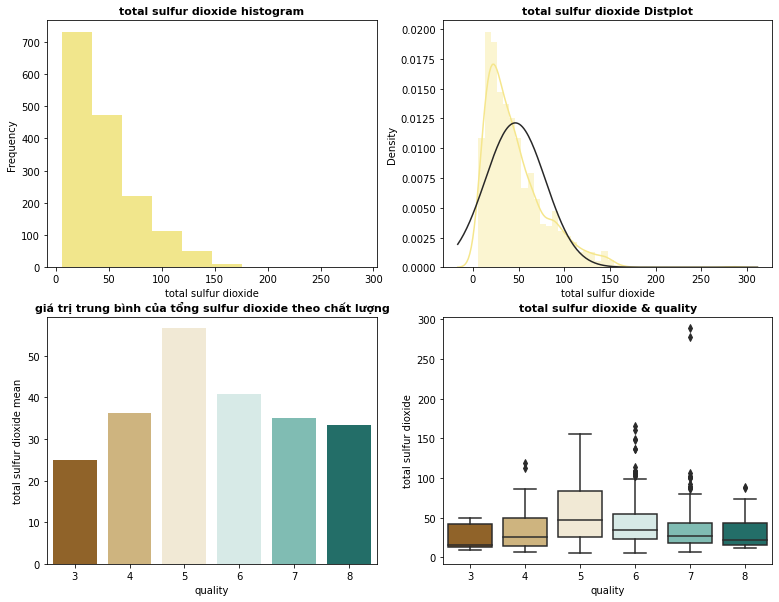

In [28]:
totalSulfurDioxideMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["total sulfur dioxide"].mean()
    totalSulfurDioxideMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["total sulfur dioxide"], color="#F1E68C")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Frequency")
plt.title("total sulfur dioxide histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="#F5E68C")
plt.title("total sulfur dioxide Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = totalSulfurDioxideMean, palette= "BrBG")
plt.title("giá trị trung bình của tổng sulfur dioxide theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("total sulfur dioxide mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["total sulfur dioxide"], palette='BrBG')
plt.title("total sulfur dioxide & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Khi xem xét các biểu đồ này, chúng ta không thấy rằng chúng có tác động thường xuyên đến biến mục tiêu.

Không dễ để đưa ra kết luận. Ở đây chúng ta thấy một độ lệch sang phải

<a id ='25' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">density</h4>

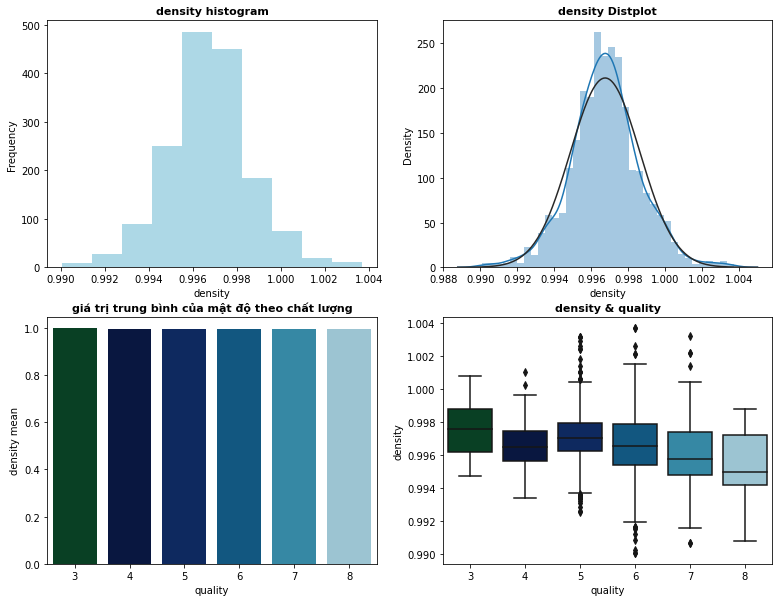

In [29]:
densityMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["density"].mean()
    densityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["density"], color="lightblue")
plt.xlabel("density")
plt.ylabel("Frequency")
plt.title("density histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["density"], fit=norm)
plt.title("density Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = densityMean, palette= "ocean")
plt.title("giá trị trung bình của mật độ theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("density mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["density"], palette='ocean')
plt.title("density & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Có vẻ như khá khó để dự đoán ảnh hưởng đối với biến mục tiêu.

 Khi chúng tôi kiểm tra biểu đồ phân tán, chúng tôi thấy rằng nó có phân phối bình thường

<a id ='26' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">pH</h4>

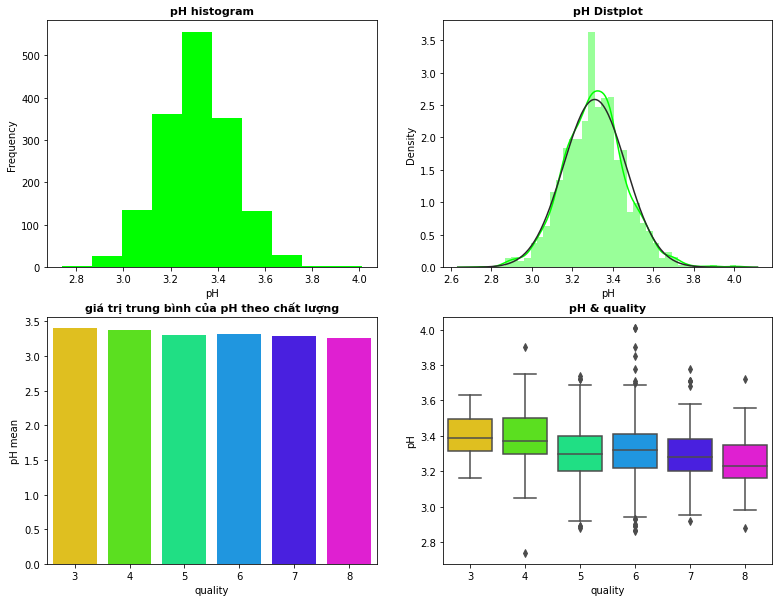

In [30]:
pHMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["pH"].mean()
    pHMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["pH"], color="#00FF00")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title("pH histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["pH"], fit=norm, color = "#00FF00")
plt.title("pH Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = pHMean, palette= "hsv")
plt.title("giá trị trung bình của pH theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("pH mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["pH"], palette='hsv')
plt.title("pH & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Ta thấy rằng giá trị pH giảm có ảnh hưởng tích cực đến phiếu bầu. 

Chúng tôi thấy rằng biểu đồ phân tán có các giá trị bình thường, ngoại lệ.

Chúng ta cần xác định và loại bỏ các ngoại lệ.

<a id ='27' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">sulphates</h4>

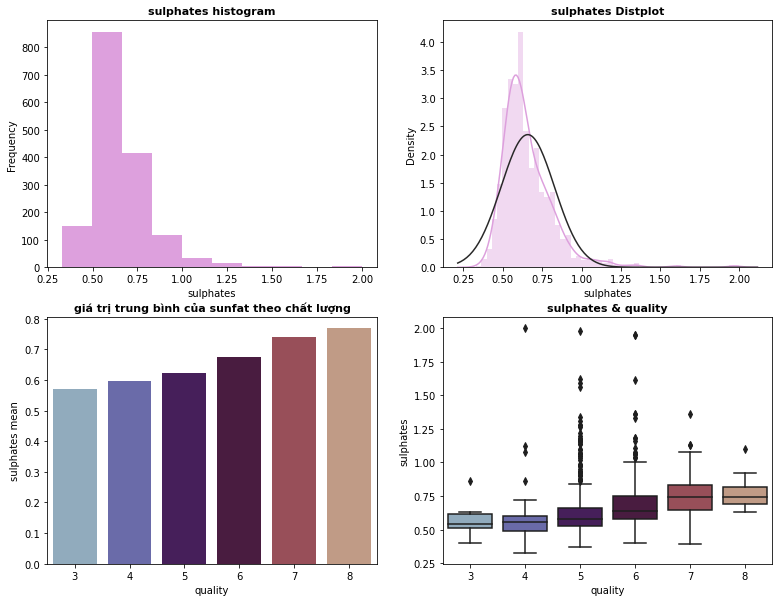

In [31]:
sulphatesMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["sulphates"].mean()
    sulphatesMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["sulphates"], color="plum")
plt.xlabel("sulphates")
plt.ylabel("Frequency")
plt.title("sulphates histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["sulphates"], fit=norm, color="plum")
plt.title("sulphates Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = sulphatesMean, palette= "twilight")
plt.title("giá trị trung bình của sunfat theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("sulphates mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["sulphates"], palette='twilight')
plt.title("sulphates & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Chúng tôi thấy rằng giá trị của sunfat càng cao thì phiếu bầu càng tích cực. 

Chúng tôi có quá nhiều ngoại lệ ở đây nên chúng tôi cần phải loại bỏ chúng.

<a id ='28' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">alcohol</h4>

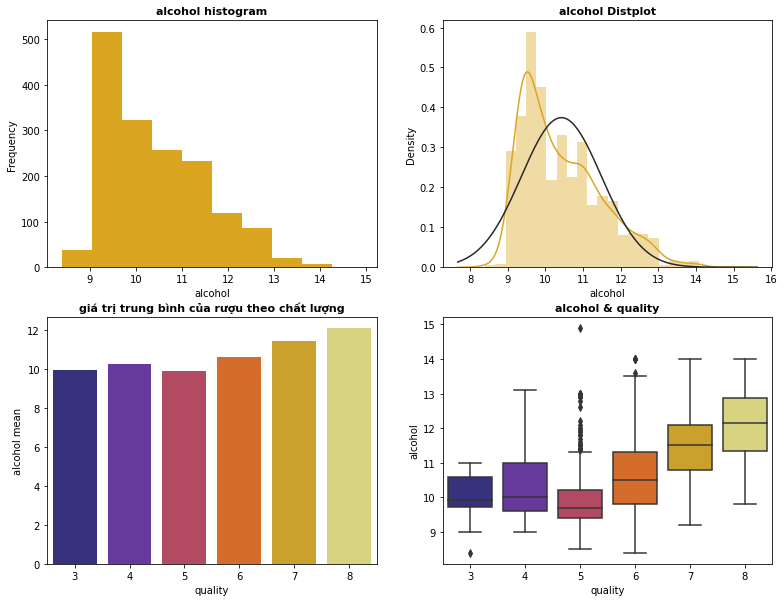

In [32]:
alcoholMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["alcohol"].mean()
    alcoholMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["alcohol"], color="#DAA520")
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.title("alcohol histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["alcohol"], fit=norm, color="#DAA520")
plt.title("alcohol Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = alcoholMean, palette= "CMRmap")
plt.title("giá trị trung bình của rượu theo chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("alcohol mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["alcohol"], palette='CMRmap')
plt.title("alcohol & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Khi xem xét biểu đồ nói chung, có thể nói rằng sự gia tăng lượng rượu có tác động tích cực đến số phiếu bầu.

 Khi chúng tôi kiểm tra biểu đồ thứ 2, chúng tôi thấy rằng có độ lệch.
 
 Chúng tôi sẽ khắc phục điều này.

<a id ='29' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">quality</h4>

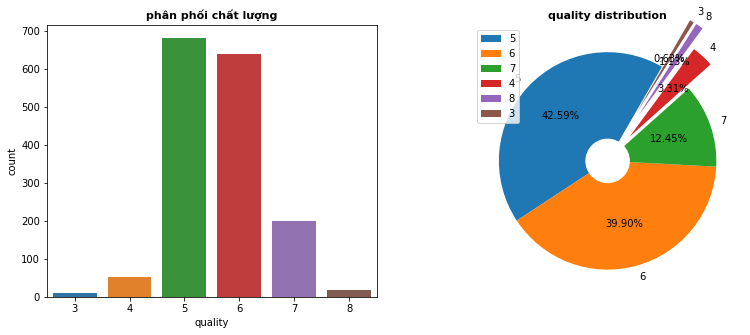

In [33]:
Number = data.quality.value_counts().values
Label = data.quality.value_counts().index
circle = plt.Circle((0,0),0.2,color = "white")
explodeTuple = (0.0, 0.0, 0.0, 0.3, 0.5, 0.5)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(data["quality"])
plt.xlabel("quality")
plt.title("phân phối chất lượng", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(1,2,2)
plt.pie(Number, labels = Label,autopct='%1.2f%%', explode=explodeTuple,startangle=60)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)
plt.legend()


plt.show()

<ul>
    <li style = "color:red;font-family:Segoe Print" > <p style = "color:black;font-family:Comic Sans MS" >Here we see the distribution of the votes.</p> </li>
</ul>

## **Hiệu chỉnh độ lệch**

Trong phần này, chúng tôi sẽ cố gắng sửa sai lệch trong một số tính năng của dữ liệu của chúng tôi.

Chúng tôi sẽ làm điều này bằng cách nhìn thấy chúng thông qua đồ thị.

<ul>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > fixed acidity </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > residual sugar </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >free sulfur dioxide </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >total sulfur dioxide </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >sulphates </p> </li>
            
</ul> 

<a id ='31' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">fixed acidity</h4>

In [34]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 8.31963727329581, sigma fixed acidity : 1.7405518001102729


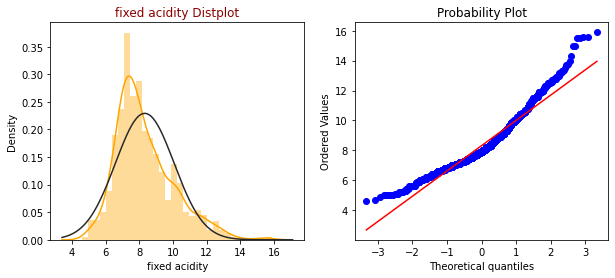

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["fixed acidity"], plot = plt)
plt.show()

Chúng tôi đã ở phía trên. Trên biểu đồ thứ hai, chúng ta thấy rằng có độ lệch

In [36]:
data["fixed acidity"], lam_fixed_acidity = boxcox(data["fixed acidity"])

Chúng tôi sẽ cố gắng loại bỏ độ lệch ở đây bằng cách sử dụng hộp cox

In [37]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 1.124655731469057, sigma fixed acidity : 0.048378082803535


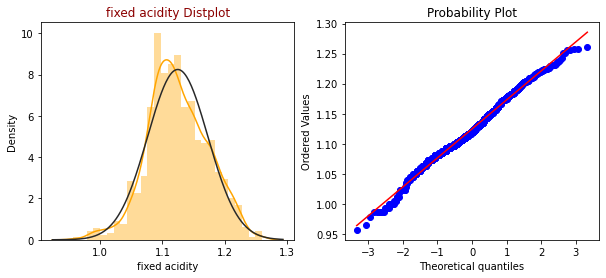

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["fixed acidity"], plot = plt)
plt.show()

# **Chúng tôi sẽ cố gắng loại bỏ độ lệch ở đây bằng cách sử dụng box cox**

# **Chuyển đổi dữ liệu có nghĩa là thực hiện cùng một phép toán trên từng phần dữ liệu gốc. Một số ví dụ chuyển đổi từ cuộc sống hàng ngày là tỷ giá hối đoái (ví dụ: đô la Mỹ thành Euro) và chuyển đổi độ C thành độ F**

<a id ='32' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">residual sugar</h4>

In [39]:
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 2.53880550343965, sigma residual sugar : 1.4094871124880495


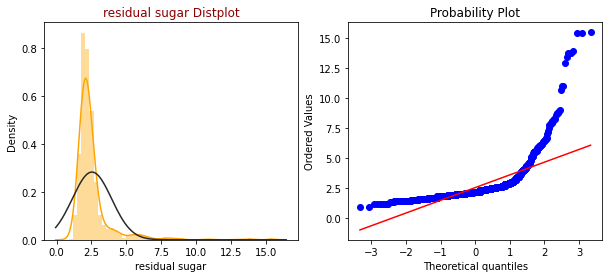

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()

In [41]:
data["residual sugar"], lam_fixed_acidity = boxcox(data["residual sugar"])

In [42]:
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 0.5135558435839319, sigma residual sugar : 0.11004598444169933


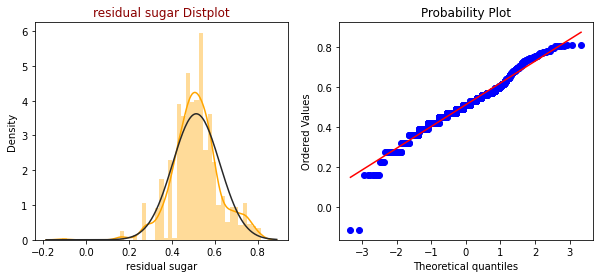

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()

<a id ='33' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">free sulfur dioxide</h4>

In [44]:
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 15.874921826141339, sigma free sulfur dioxide : 10.45688561493072


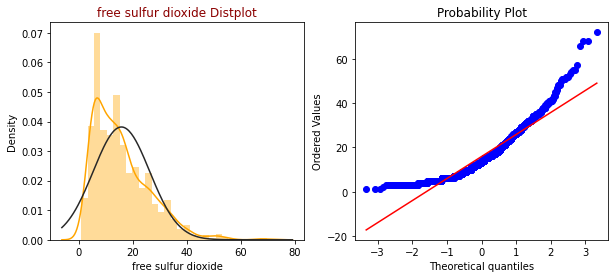

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

In [46]:
data["free sulfur dioxide"], lam_fixed_acidity = boxcox(data["free sulfur dioxide"])

In [47]:
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 3.1290485296425143, sigma free sulfur dioxide : 0.9855086968773705


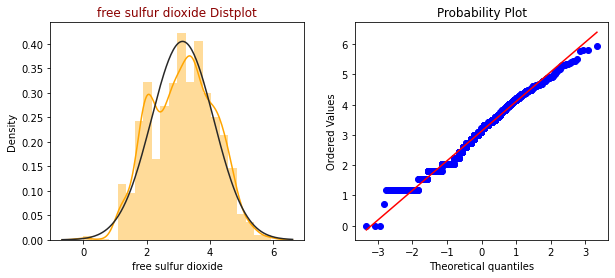

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

<a id ='34' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">total sulfur dioxide</h4>

In [49]:
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 46.46779237023139, sigma total sulfur dioxide : 32.88503665178374


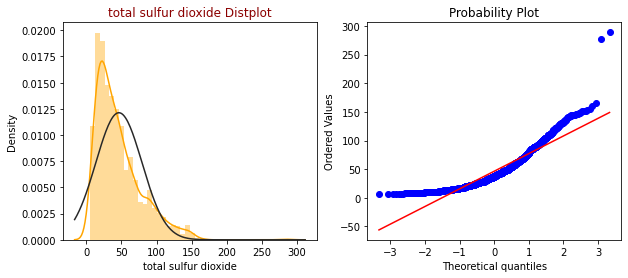

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

In [51]:
data["total sulfur dioxide"], lam_fixed_acidity = boxcox(data["total sulfur dioxide"])

In [52]:
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 3.9657192644535324, sigma total sulfur dioxide : 0.8459104716754929


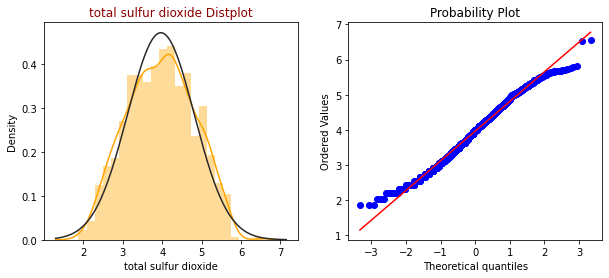

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

<a id ='35' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">alcohol</h4>

In [54]:
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 10.422983114446529, sigma alcohol : 1.0653343003437483


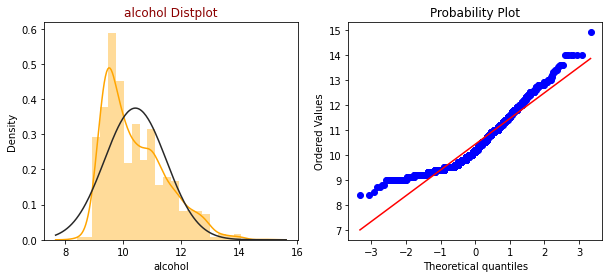

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

In [56]:
data["alcohol"], lam_fixed_acidity = boxcox(data["alcohol"])

In [57]:
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 0.3005237243397624, sigma alcohol : 3.922651387741175e-05


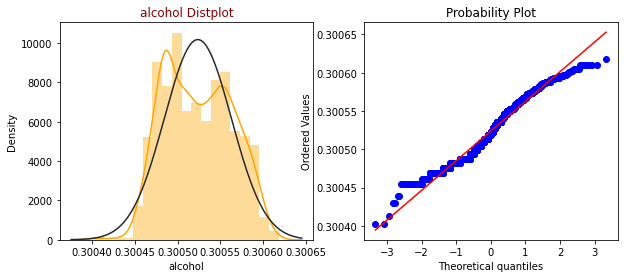

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

Phát hiện ngoại lệ

 Chúng tôi phát hiện các giá trị ngoại lai trong dữ liệu của mình. và chúng tôi sẽ trích xuất chúng từ dữ liệu.

In [91]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [92]:
print("số ngoại lệ được phát hiện --> ",len(data.loc[detect_outliers(data,data.columns[:-1])]))
data.loc[detect_outliers(data,data.columns[:-1])]

số ngoại lệ được phát hiện -->  9


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
816,1.033902,1.010,0.66,0.473382,0.039,3.317116,5.026654,0.99357,3.66,0.60,0.300567,0
1126,1.022940,0.915,0.00,0.494302,0.041,3.504207,4.875725,0.99346,3.68,0.73,0.300564,0
132,0.998929,0.340,0.00,0.423877,0.050,4.225977,4.610758,0.99160,3.68,0.79,0.300610,0
134,0.998929,0.340,0.00,0.423877,0.050,4.225977,4.610758,0.99160,3.68,0.79,0.300610,0
80,1.140811,0.490,0.28,0.450049,0.110,3.752263,5.579066,0.99720,2.93,1.95,0.300509,0
85,1.140811,0.490,0.28,0.450049,0.110,3.752263,5.579066,0.99720,2.93,1.95,0.300509,0
86,1.140811,0.490,0.29,0.473382,0.110,3.673341,5.550463,0.99720,2.93,1.98,0.300504,0
683,1.092298,0.310,0.30,0.513157,0.053,4.699860,5.491371,0.99650,2.94,1.62,0.300488,0
1114,1.172683,0.540,0.26,0.473382,0.111,2.248371,4.550629,0.99709,2.94,0.98,0.300523,0


In [93]:
data = data.drop(detect_outliers(data,data.columns[:-1]),axis = 0).reset_index(drop = True)

Chúng tôi xóa các ngoại lệ được phát hiện khỏi dữ liệu của mình

In [94]:
print("số ngoại lệ được phát hiện --> ",len(data.loc[detect_outliers(data,data.columns[:-1])]))
data.loc[detect_outliers(data,data.columns[:-1])]

số ngoại lệ được phát hiện -->  0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


# **Mô hình**
Bây giờ dữ liệu của chúng tôi đã sẵn sàng cho mô hình. Bây giờ chúng ta sẽ tạo các mô hình của mình.

Nhập thư viện mô hình

Đào tạo - Tách Test
 Train - Test Split 

 StandardScaler
 
KNeighborsClassifier

 RandomForestClassifier
            


<a id ='38' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Import Model Library</h4>

In [62]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import collections

In [63]:
bins = (2, 6.5, 8)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

Ta biến chất lượng biến thành 2 biến 0 và 1.


In [64]:
data['quality'].value_counts()

0    1323
1     208
Name: quality, dtype: int64

0 -> 1323 

1 -> 208 

Chúng tôi thấy rằng có một sự khác biệt lớn giữa 2 giá trị. 

Vì vậy, chúng tôi thấy rằng nó là không cân bằng. Chúng tôi sẽ khắc phục điều này.

<a id ='39' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Train - Test Split</h4>

In [65]:
y = data.quality
X = data.drop(["quality"], axis = 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<a id ='41' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">StandardScaler</h4>

In [95]:
sc = StandardScaler()

In [96]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [97]:
results = []

# **Random Forest Classifier**


In [70]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [71]:
print(accuracy_score(pred_rfc,y_test))
print(classification_report(y_test, pred_rfc))

0.9022801302931596
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       268
           1       0.67      0.46      0.55        39

    accuracy                           0.90       307
   macro avg       0.80      0.71      0.75       307
weighted avg       0.89      0.90      0.89       307



Rừng ngẫu nhiên cho độ chính xác 90%

# **Support Vector Classifier**

In [72]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [75]:
print("Độ chính xác của mô hình : ",accuracy_score(pred_svc,y_test))
print(classification_report(y_test, pred_svc))

Độ chính xác của mô hình :  0.8990228013029316
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       268
           1       0.68      0.38      0.49        39

    accuracy                           0.90       307
   macro avg       0.80      0.68      0.72       307
weighted avg       0.89      0.90      0.89       307



Máy hỗ trợ véc tơ cho độ chính xác 89% chỉ thấp hơn RFC 1%

# **K-NN Model**

In [76]:
knn = KNeighborsClassifier()

Điều chỉnh siêu tham số cho Mô hình KNN

tìm kiếm các siêu đường kính tốt nhất bằng phương pháp GridSearchCV

In [77]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

Nhận các thông số tốt nhất của mô hình KNN


In [78]:
print("Độ chính xác cao nhất khi train: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("giá trị K tốt nhất: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\ntrọng lượng tốt nhất: " + knn_cv_model.best_params_["weights"],
     "\nkích thước lá tốt nhất: " + str(knn_cv_model.best_params_["leaf_size"]))

Độ chính xác cao nhất khi train: 0.9093562574970011
____________________________________________
giá trị K tốt nhất: 6 
trọng lượng tốt nhất: distance 
kích thước lá tốt nhất: 25


Xây dựng mô hình KNN với các thông số tốt nhất

In [79]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=6, weights='distance')

Điểm chính xác của Mô hình KNN khi đem ra để test

In [81]:
y_pred = knn_model.predict(X_test)
print("Độ chính xác của mô hình",accuracy_score(y_test, y_pred))

Độ chính xác của mô hình 0.8925081433224755


Báo cáo phân loại mô hình KNN

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       268
           1       0.57      0.62      0.59        39

    accuracy                           0.89       307
   macro avg       0.76      0.77      0.77       307
weighted avg       0.90      0.89      0.89       307



Qua đó có thể thấy rằng : Thuật toán Rừng ngẫu nhiên có độ chính xác cao nhất và chúng ta sẽ sử dụng nó để dự đoán chất lượng rượu.